In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math
import sys
from vcf_helpers import extract_variant_features, normalize_vcf_features_for_prediction
from cyvcf2 import VCF
from pathlib import Path

sys.path.append(str(Path().resolve().parents[2] / "src" / "python"))
from paths import data_path, training_path

In [2]:
# the csv created by the preprocessing notebooks
train_df = pd.read_csv("vcf_feature_vectors.csv")

In [3]:
validation_vcf = "E21323_S15_GATK_4_1_0_0.hg19_multianno.vcf"
reader = VCF(validation_vcf)

# INFO and FORMAT fields to extract
info_fields = [
    "MBQ", "MMQ"
]

format_fields = [
    "AD", "AF", "F1R2", "F2R1"
]

split_ref_alt_fields = {"AD", "AF", "F1R2", "F2R1"}
split_info_ref_alt = {"MBQ", "MMQ"}

val_df = extract_variant_features(reader, info_fields, format_fields, split_info_ref_alt, split_ref_alt_fields, 0)

val_df = normalize_vcf_features_for_prediction(
    val_df,
    robust_scaler_path="robust_scaler.pkl"
)

In [4]:
common_cols = sorted(set(train_df.columns) & set(val_df.columns))
common_cols

['AD_alt',
 'AD_ref',
 'AF',
 'ALT',
 'CHROM',
 'F1R2_alt',
 'F1R2_ref',
 'F2R1_alt',
 'F2R1_ref',
 'MBQ_alt',
 'MBQ_ref',
 'MMQ_alt',
 'MMQ_ref',
 'POS',
 'REF']

In [5]:
cols_to_plot = [col for col in common_cols if col not in ["CHROM", "POS", "REF", "ALT", "GOLDEN"]]

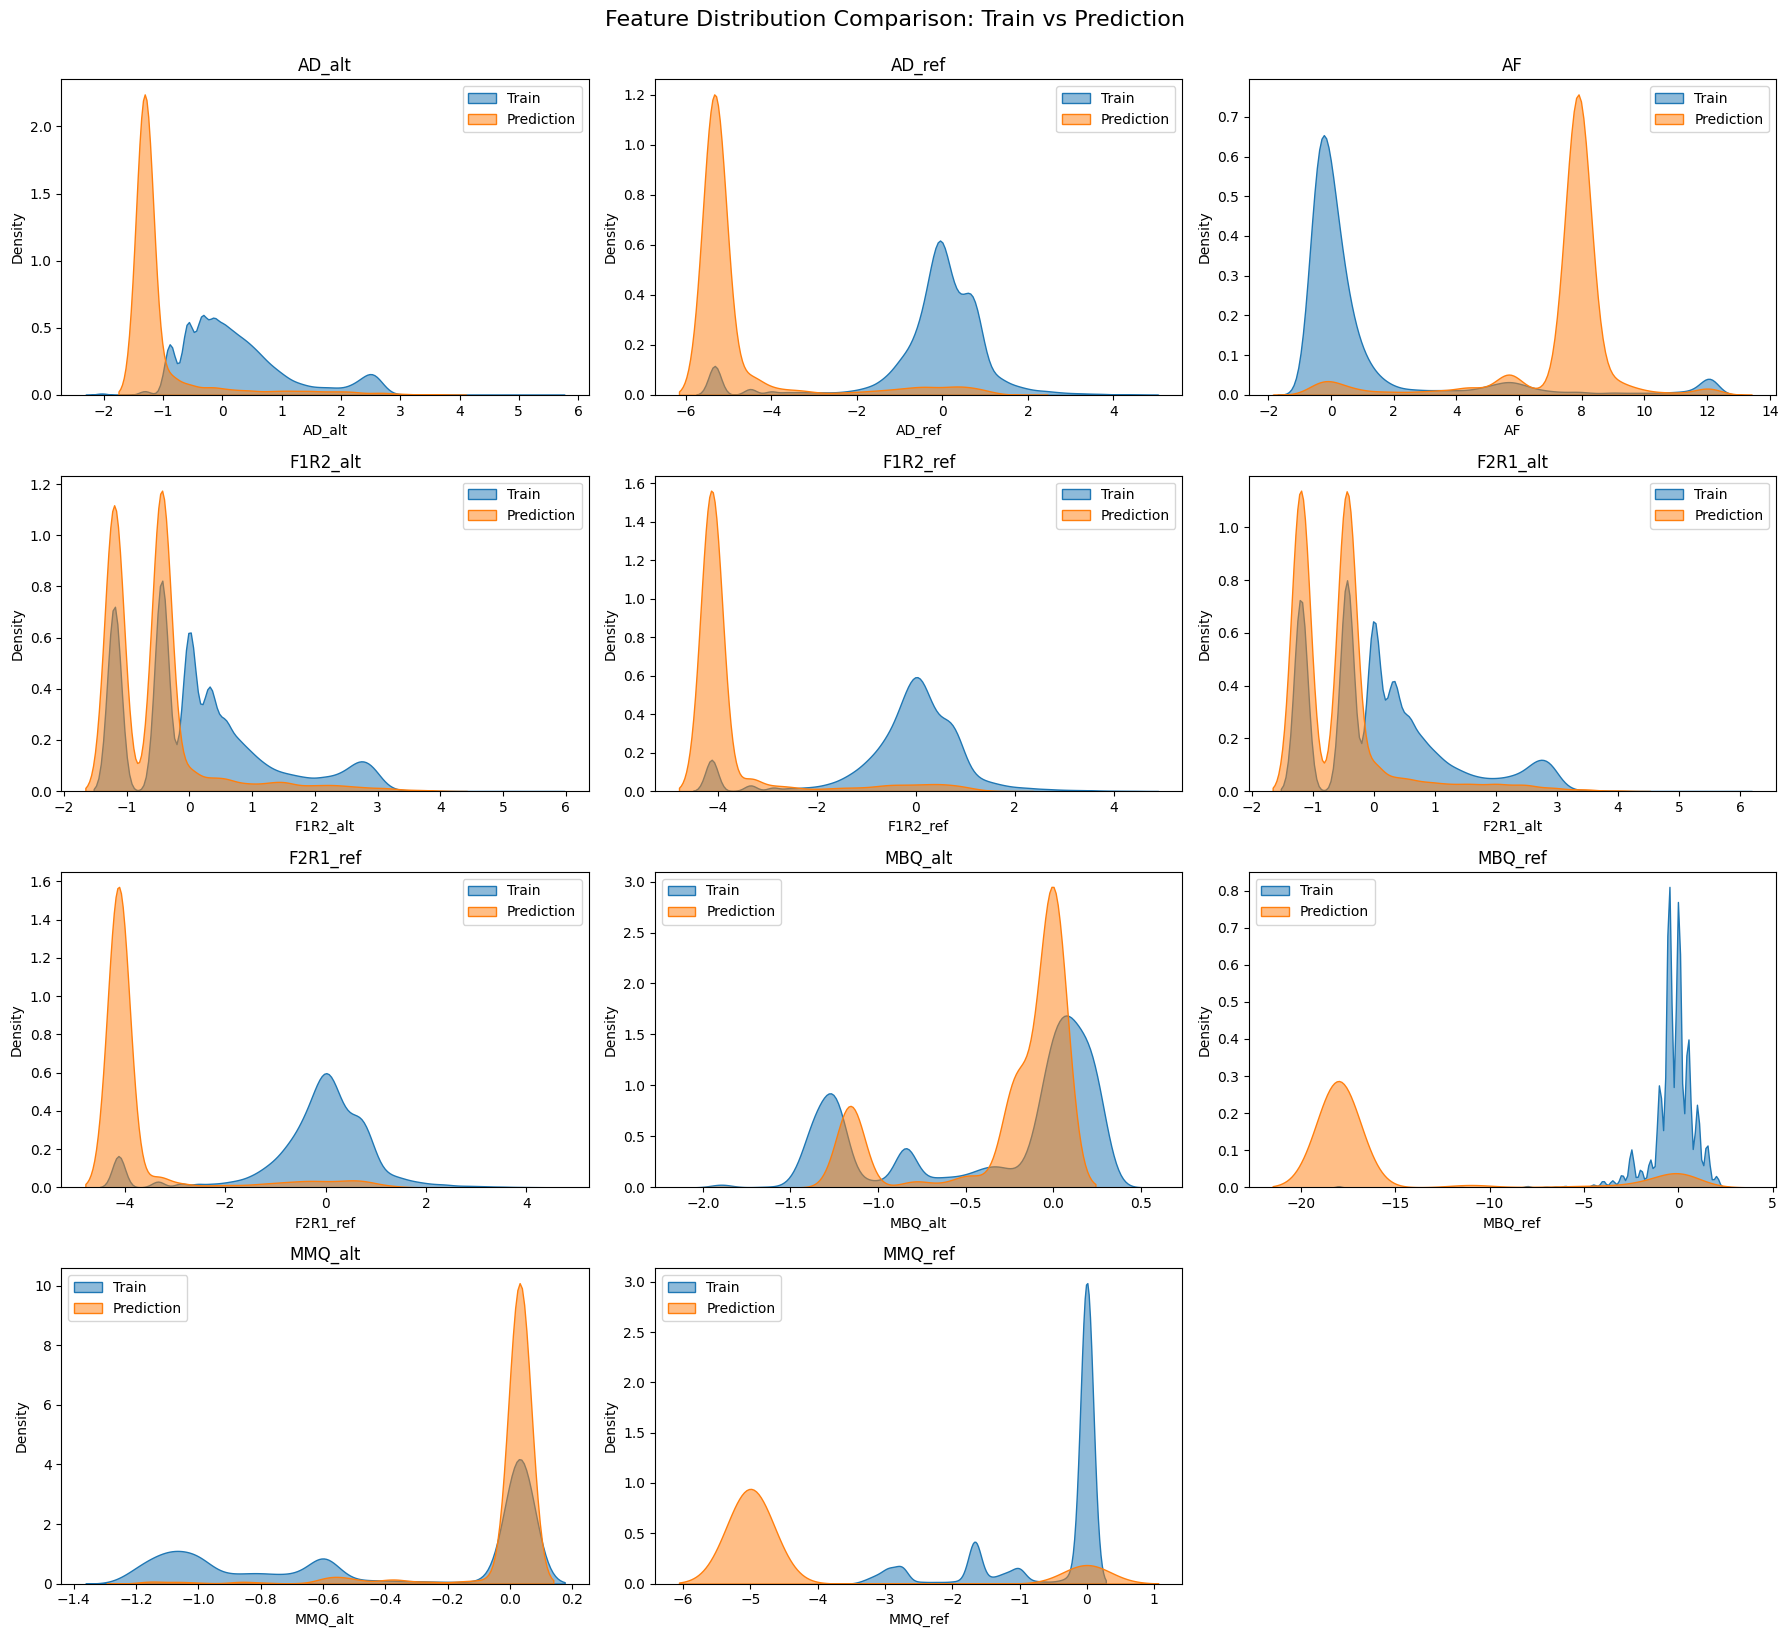

In [6]:
# Determine subplot grid size
n_cols = 3
n_rows = math.ceil(len(cols_to_plot) / n_cols)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 4))

# Plot each feature
for i, col in enumerate(cols_to_plot):
    ax = axes.flat[i]
    sns.kdeplot(train_df[col], label='Train', fill=True, alpha=0.5, ax=ax)
    sns.kdeplot(val_df[col], label='Prediction', fill=True, alpha=0.5, ax=ax)
    ax.set_title(col)
    ax.legend()

# Hide unused subplots
for j in range(len(cols_to_plot), len(axes.flat)):
    axes.flat[j].set_visible(False)

# Layout and title
plt.tight_layout()
plt.suptitle("Feature Distribution Comparison: Train vs Prediction", fontsize=16, y=1.02)
plt.show()